# Recursion Experimentation

## Executive Summary
Recursive functions are a method of implementation using the "call stack." Although often preferred for simplicity, recursive programs are known to be slower and require more memory than their iterative counterparts. Every function that can be implemented recursively can also be implemented iteratively. In this experiment we show that both algorithms are fast for calculating large factorial numbers, but on average the recursive function is slower than the iterative method (as expected). Assuming multiplication is a constant time operation $O(1)$, then both the recursive and iterative implementation of a factorial function are said to be in $O(n)$ time complexity. 

In [ ]:
import numpy as np
import pandas as pd
import time
import string
import random
import matplotlib.pyplot as plt


plt.style.use('bmh')
np.random.seed = 34 #set seed
LOG = {} # Define Log

arr_size = 10
array_test = np.random.randint(100,500,arr_size)

## Timing Mechanism
The timing mechanism used in this experiment wraps functions and times their overall time to return function output.
A dictionary "LOG" is updated with the output times of the functions

In [ ]:
def timeit(log):
    """ Wraps functions needing timing provided a dictionary to dump into based on function name"""
    def log_it(func):
        def wrapped(*args, **kw):
            ts = time.time_ns() // 1000000 
            result = func(*args, **kw)
            te = time.time_ns() // 1000000 
            if func.__name__ in log.keys():
                log[func.__name__].append(te-ts)
            else:
                log[func.__name__] = [te-ts]
            return result
        return wrapped
    return log_it

## Factorial (For Loop) 

The iterative factorial function sets a range of numbers based on the provided input, and loops through times equalling the value. When the descending loop is finished, the value is returned.

In [3]:
@timeit(LOG)
def factorial(number):
    value = 1
    for e in range(1,number+1):
        value *= e
    return value


In [4]:
facs = []
for test_element in array_test:
    f = factorial(test_element)
    facs.append(f)

## Factorial (Recursive Stack) 

The decorator function requires timing of the full recursive stack and so it requires a wrapper function to capture the entire recursive call stack. 

In [5]:
@timeit(LOG)
def factorial_full_recursive_stack(n):
    def factorial_recur(n):
        if n == 1:
            return 1
        rn = n*factorial_recur(n-1)  
        return rn

    return factorial_recur(n)

In [6]:
facs_recur = []
for test_element in array_test:
    test_element = int(test_element)
    f = factorial_full_recursive_stack(test_element)
    facs_recur.append(f)

## Check Equality

The outputted answers by each algorithm implementation are equivalent.

In [7]:
facs == facs_recur

True

## Results / Visualization

The results show that the python implementations of a factorial function in recursive or iterative methods do not differ much in their processing time. In fact the difference is negligable in both cases given that the most common time taken to process was 0ms. However, the average run time for the iterative implementation of the factorial algorithm was .4ms faster (.1ms) than the recursive implementation (.5ms). This suggests and confirms that iterative methods are faster than recursive methods. The main advantage of using a recursive method is thought to be implemented more intuitively by the programmer. In my experience the iterative implementation is much shorter, more consise, and faster than its recursive counterpart.

##### Time Complexity
Although many of the timings below are near 0 milliseconds, if we analyze the algorithms they appear to be on a time complexity of $O(n)$. In the iterative case, the algorithm just makes one pass for the range of the input number with one multiplication action at each step (multiplication is assumed to be $O(1)$, but this is often debated when analyzing the time complexity of factorial algorithms). In the recursive case, the call stack will also go to the depth of the range of the input number and if we assume multiplication is $O(1)$ again, the time complexity is also $O(n)$.



In [8]:
df = pd.DataFrame({
    'number_to_factorial':array_test,
    'for_loop(ms)': LOG['factorial'],
    'recursive(ms)': LOG['factorial_full_recursive_stack'],
    'factorial':list(map(str, facs)),
})
df['time_difference'] = df['for_loop(ms)'] - df['recursive(ms)']


In [9]:
df.head()

,number_to_factorial,for_loop(ms),recursive(ms),factorial,time_difference
0,468,0,1,1443882658169499166327952709151618897675331405...,-1
1,198,0,1,1981552430564800260181817120432625784661145672...,-1
2,195,0,0,2591899036156656511480987645585432937922090573...,0
3,158,0,0,1853271869493734796543609753051078529682360939...,0
4,410,0,0,7695091858866763366263438655668964498487195079...,0


In [10]:
df.mean()

number_to_factorial    284.7
for_loop(ms)             0.1
recursive(ms)            0.5
factorial                inf
time_difference         -0.4
dtype: float64

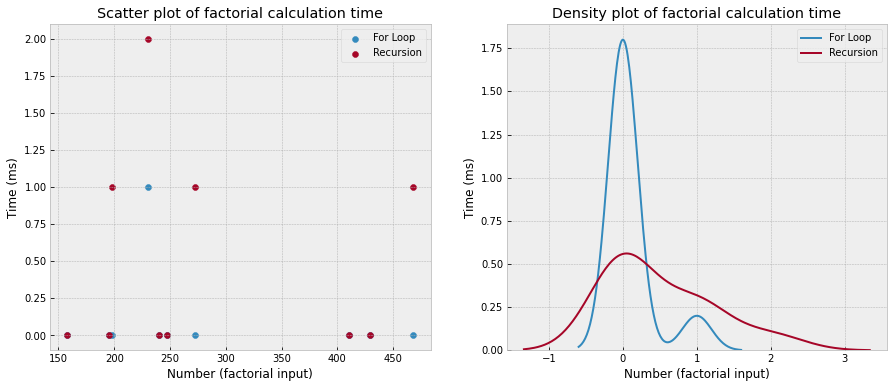

In [11]:
import seaborn as sns
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))
ax1,ax2 = axes.flatten()

ax1.scatter(df['number_to_factorial'], df['for_loop(ms)'],label = 'For Loop')
ax1.scatter(df['number_to_factorial'], df['recursive(ms)'], label = 'Recursion')
ax1.set_title('Scatter plot of factorial calculation time')
ax1.set_xlabel('Number (factorial input)')
ax1.set_ylabel('Time (ms)')
ax1.legend()

sns.kdeplot(df['for_loop(ms)'],label = 'For Loop',  ax = ax2)
sns.kdeplot( df['recursive(ms)'], label = 'Recursion',  ax = ax2)
ax2.set_title('Density plot of factorial calculation time')
ax2.set_xlabel('Number (factorial input)')
ax2.set_ylabel('Time (ms)')
ax2.legend()

